In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.options.display.max_columns=999 
plt.style.use('fivethirtyeight')

# One Quantitative Variable - Measures Of Center

The overall pattern of the distribution of a quantitative variable is described by its shape, center, and spread. By inspecting the histogram, we can describe the shape of the distribution, but as we saw, we can only get a rough estimate for the center and spread. A description of the distribution of a quantitative variable must include, in addition to the graphical display, a more precise numerical description of the center and spread of the distribution. In this section we will learn:

* how to quantify the center and spread of a distribution with various numerical measures;
* some of the properties of those numerical measures; and
* how to choose the appropriate numerical measures of center and spread to supplement the histogram.

# Mode, Mean & Median 

Intuitively speaking, the numerical measure of center is telling us what is a “typical value” of the distribution.

The three main numerical measures for the center of a distribution are the mode, the mean and the median. Each one of these measures is based on a completely different idea of describing the center of a distribution. We will first present each one of the measures, and then compare their properties.

## Mode 

So far, when we looked at the shape of the distribution, we identified the mode as the value where the distribution has a “peak” and saw examples when distributions have one mode (unimodal distributions) or two modes (bimodal distributions). In other words, so far we identified the mode visually from the histogram.

Technically, the mode is the most commonly occurring value in a distribution. For simple datasets where the frequency of each value is available or easily determined, the value that occurs with the highest frequency is the mode.

### Example: Best Actress Oscar Winners

We will continue with the Best Actress Oscar winners example.

In [2]:
actress = pd.read_csv('../Data/actress_2013.txt')

In [3]:
actress.head()

,Year,Name,Movie,Age
0,1970,Glenda Jackson,Women in Love,34
1,1971,Jane Fonda,Klute,34
2,1972,Liza Minnelli,Cabaret,27
3,1973,Glenda Jackson,A Touch of Class,37
4,1974,Ellen Burstyn,Alice Doesn't Live Here Anymore,42


To find the most commonly occurring, or modal, age, it is helpful to list the ages in a frequency table.

In [4]:
actress['Age'].value_counts()

33    5
41    3
34    3
29    3
42    2
45    2
36    2
35    2
49    2
61    2
32    2
26    2
80    1
21    1
22    1
28    1
27    1
25    1
62    1
30    1
31    1
37    1
38    1
39    1
44    1
74    1
Name: Age, dtype: int64

The mode is 33, since it occurs the most times (5).

In [5]:
#Another way to calculate it. 
actress['Age'].mode()[0]

33

## Mean 

The mean is the average of a set of observations (i.e., the sum of the observations divided by the number of observations).

In [6]:
actress['Age'].mean()

38.34090909090909

So, the mean Age of the 44 Actresses is 38.3. Note that the mean gives a measure of center which is higher than our approximation of the center from looking at the histogram (which was 34). The reason for this will be clear soon.

## Median 

The median M is the midpoint of the distribution. It is the number such that half of the observations fall above, and half fall below. 

To find the median:

* Order the data from smallest to largest.
* Consider whether n, the number of observations, is even or odd.
    * If n is odd, the median M is the center observation in the ordered list. This observation is the one "sitting" in the (n + 1) / 2 spot in the ordered list.
    * If n is even, the median M is the mean of the two center observations in the ordered list. These two observations are the ones "sitting" in the n / 2 and n / 2 + 1 spots in the ordered list.

### Example: Median(1)

For a simple visualization of the location of the median, consider the following two simple cases of n = 7 and n = 8 ordered observations, with each observation represented by a solid circle:

![image](../img/median1.png)

In [7]:
# Median calculation
actress['Age'].median()

34.5

### Comparing Mean and Median

As we have seen, mean and the median, two of the common measures of center, each describe the center of a distribution of values in a different way. The mean describes the center as an average value, in which the actual values of the data points play an important role. The median, on the other hand, locates the middle value as the center, and the order of the data is the key to finding it. 

To get a deeper understanding of the differences between these two measures of center, consider the following example.

Here are two datasets:
* Data set A → 64 65 66 68 70 71 73
* Data set B → 64 65 66 68 70 71730

For dataset A, the mean is 68.1, and the median is 68. Looking at dataset B, notice that all of the observations except the last one are close together. The observation 730 is very large, and is certainly an outlier. In this case, the median is still 68, but the mean will be influenced by the high outlier, and shifted up to 162. The message that we should take from this example is:

The mean is very sensitive to outliers (because it factors in their magnitude), while the median is resistant to outliers.

Therefore:

- For symmetric distributions with no outliers: Mean is approximately equal to Median.

![image](../img/mean_median1.png)

- For skewed right distributions and/or datasets with high outliers: Mean is greater than the Median

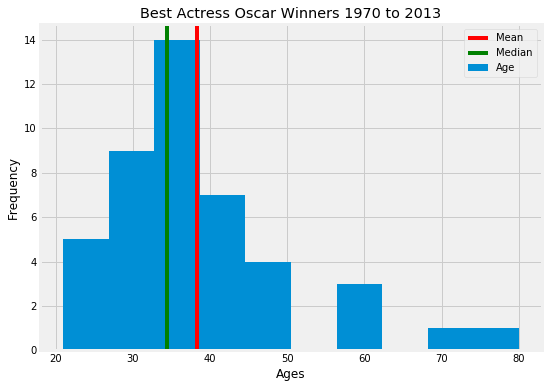

In [8]:
actress['Age'].plot.hist(figsize=(8,6))
plt.axvline(x=actress['Age'].mean(), label='Mean', color='red')
plt.axvline(x=actress['Age'].median(), label='Median', color='green')
plt.xlabel('Ages')
plt.title('Best Actress Oscar Winners 1970 to 2013')
plt.legend()
plt.show()

- For skewed left distributions and/or datasets with low outliers: Mean will be less than the Median 


![image](../img/mean_median2.png)

We will therefore use  mean as a measure of center for symmetric distributions with no outliers. Otherwise, the median will be a more appropriate measure of the center of our data.

### Let's Summarize

The three main numerical measures for the center of a distribution are the mode, mean, and the median. 
* The mode is the most frequently occurring value. The mean is the average value, while the median is the middle value.
* The mean is very sensitive to outliers (as it factors in their magnitude), while the median is resistant to outliers.
* The mean is an appropriate measure of center only for symmetric distributions with no outliers. In all other cases, the median should be used to describe the center of the distribution.

### Scenario: Depression

In the workplace, depression is a leading cause of absenteeism and loss of productivity (Greenberg, et al. 1993). To assess the degree to which people suffer from depression, prior to receiving treatment, data were collected on the number of days that 105 patients were depressed prior to starting a new treatment.

In [9]:
depression = pd.read_csv('../Data/depression.csv')
depression.head()

,Hospt,Treat,Outcome,Time,AcuteT,Age,Gender
0,1,Lithium,Recurrence,36.143,211,33,1
1,1,Imipramine,No Recurrence,105.143,176,49,1
2,1,Imipramine,No Recurrence,74.571,191,50,1
3,1,Lithium,Recurrence,49.714,206,29,2
4,1,Lithium,No Recurrence,14.429,63,29,1


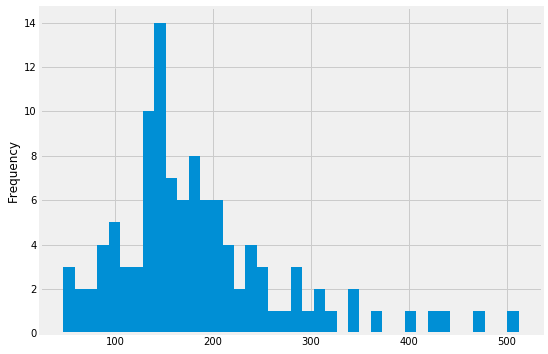

In [10]:
depression['AcuteT'].plot.hist(bins=40, figsize=(8,6));

Q - what is median number of days that patients were depressed?

In [11]:
depression['AcuteT'].median()

165.0

Q - Using this same histogram of 105 patients, which of the following is most likely to be true?
* A. The mean will be larger than the median?
* B. The Median will be larger than the mean?
* c. The mean and median will be about the same?

Answer - A

Q - Using this same histogram of 105 patients, what percentage of patients had 220 or more days of depression?

In [12]:
# Select all the data where AcuteT is greater than or equal to 220
high_depression = depression[depression['AcuteT'] >= 220]
high_depression_percent = len(high_depression) / len(depression) * 100 
high_depression_percent

23.853211009174313

Here, we first calculate the number of patients who experienced 220 or more days of depression(by using the len 
function) is divided by the total number of patients and then multiplied it with 100. 

# One Quantitative Variable: Measures of Spread - Range, IQR, & Outliers 

So far we have learned about different ways to quantify the center of a distribution. A measure of center by itself is not enough, though, to describe a distribution. Consider the following two distributions of exam scores. Both distributions are centered at 70 (the median of both distributions is approximately 70), but the distributions are quite different. The first distribution has a much larger variability in scores compared to the second one.

![image](../img/spread1.png)

In order to describe the distribution, we therefore need to supplement the graphical display not only with a measure of center, but also with a measure of the variability (or spread) of the distribution.

In this section, we will discuss the three most commonly used measures of spread:

* Range
* Inter-quartile range (IQR)
* Standard deviation

Like the different measures of center, these measures provide different ways to quantify the variability of the distribution.

## Range 

The range covered by the data is the most intuitive measure of variability. The range is exactly the distance between the smallest data point (min) and the largest one (Max).

**Range = Max - min** 

Note: When we first looked at the histogram, and tried to get a first feel for the spread of the data, we were actually approximating the range, rather than calculating the exact range. 

### Example: Best Actress Oscar Winners

In [13]:
min_age = actress['Age'].min()
max_age = actress['Age'].max()
age_range = max_age - min_age
age_range

59

The range covered by all the data is 59 years.

## Inter-Quartile Range (IQR)

While the range quantifies the variability by looking at the range covered by ALL the data, the IQR measures the variability of a distribution by giving us the range covered by the MIDDLE 50% of the data.

The following picture illustrates this idea: (Think about the horizontal line as the data ranging from the min to the Max).

![image](../img/IQR1.png)

Here is how the IQR is actually found:

1. Arrange the data in increasing order, and find the median M. Recall that the median divides the data, so that 50% of the data points are below the median, and 50% of the data points are above the median.

![image](../img/IQR2.png)

2. Find the median of the lower 50% of the data. This is called the first quartile of the distribution, and the point is denoted by Q1. Note from the picture that Q1 divides the lower 50% of the data into two halves, containing 25% of the data points in each half. Q1 is called the first quartile, since one quarter of the data points fall below it.

![image](../img/IQR3.png)

3. Repeat this again for the top 50% of the data. Find the median of the top 50% of the data. This point is called the third quartile of the distribution, and is denoted by Q3. Note from the picture that Q3 divides the top 50% of the data into two halves, with 25% of the data points in each. Q3 is called the third quartile, since three quarters of the data points fall below it.

![image](../img/IQR4.png)

4. The middle 50% of the data falls between Q1 and Q3, and therefore:
IQR = Q3 - Q1

![image](../img/IQR5.png)



### Comments

1. The last picture shows that Q1, M, and Q3 divide the data into four quarters with 25% of the data points in each, where the median is essentially the second quartile. The use of IQR = Q3 - Q1 as a measure of spread is therefore particularly appropriate when the median M is used as a measure of center.

2. We can define a bit more precisely what is considered the bottom or top 50% of the data. The bottom (top) 50% of the data is all the observations whose position in the ordered list is to the left (right) of the location of the overall median M. The following picture will visually illustrate this for the simple cases of n = 7 and n = 8

![image](../img/IQR6.png)

Note that when n is odd (as in n = 7 above), the median is not included in either the bottom or top half of the data; When n is even (as in n = 8 above), the data are naturally divided into two halves.

### Calculating the IQR

In [15]:
# helpful function to get the summary statistics
actress['Age'].describe()

count    44.000000
mean     38.340909
std      12.736951
min      21.000000
25%      30.750000
50%      34.500000
75%      42.000000
max      80.000000
Name: Age, dtype: float64

In [16]:
# this gives the Q1
actress['Age'].quantile(.25)

30.75

In [17]:
actress['Age'].quantile(.75)

42.0

In [18]:
IQR = actress['Age'].quantile(.75) - actress['Age'].quantile(.25)
IQR 

11.25

Note that in this example, the range covered by all the ages is 59 years, while the range covered by the middle 50% of the ages is only 11.5 years. While the whole dataset is spread over a range of 59 years, the middle 50% of the data is packed into only 11.5 years. 

### Comment

Software packages use different formulas to calculate the quartiles Q1 and Q3. This should not worry you, as long as you understand the idea behind these concepts. Note that Q1 and Q3 as reported by the various software packages differ from each other and are also slightly different from the ones we found here. There are different acceptable ways to find the median and the quartiles. These can give different results occasionally, especially for datasets where n (the number of observations) is fairly small. As long as you know what the numbers mean, and how to interpret them in context, it doesn't really matter much what method you use to find them, since the differences are really negligible.